In [38]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [39]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


In [40]:
X = tips.drop(columns = ['total_bill', 'tip', 'tip_pct']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   size         244 non-null    int64
 1   sex_Female   244 non-null    bool 
 2   smoker_No    244 non-null    bool 
 3   day_Fri      244 non-null    bool 
 4   day_Sat      244 non-null    bool 
 5   day_Sun      244 non-null    bool 
 6   time_Dinner  244 non-null    bool 
dtypes: bool(6), int64(1)
memory usage: 3.5 KB
None


,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,2,True,True,False,False,True,True
1,3,False,True,False,False,True,True
2,3,False,True,False,False,True,True
3,2,False,True,False,False,True,True
4,4,True,True,False,False,True,True


In [41]:
y =  tips.loc[:,'tip']
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [43]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

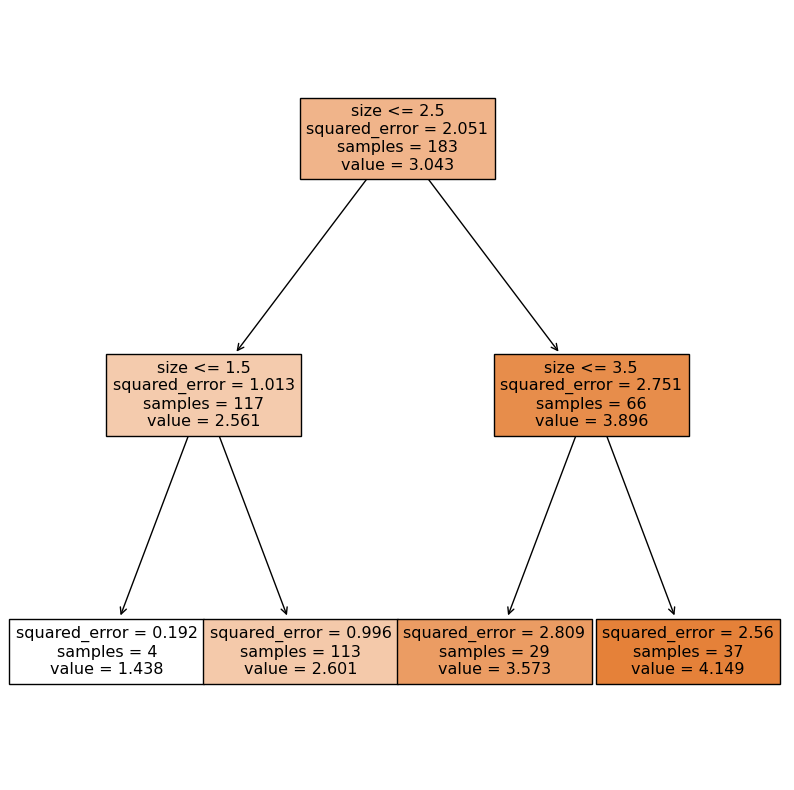

In [44]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

In [45]:
arvore_final = DecisionTreeRegressor(random_state=0, max_depth=5, ccp_alpha=.01)
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=5, random_state=0)

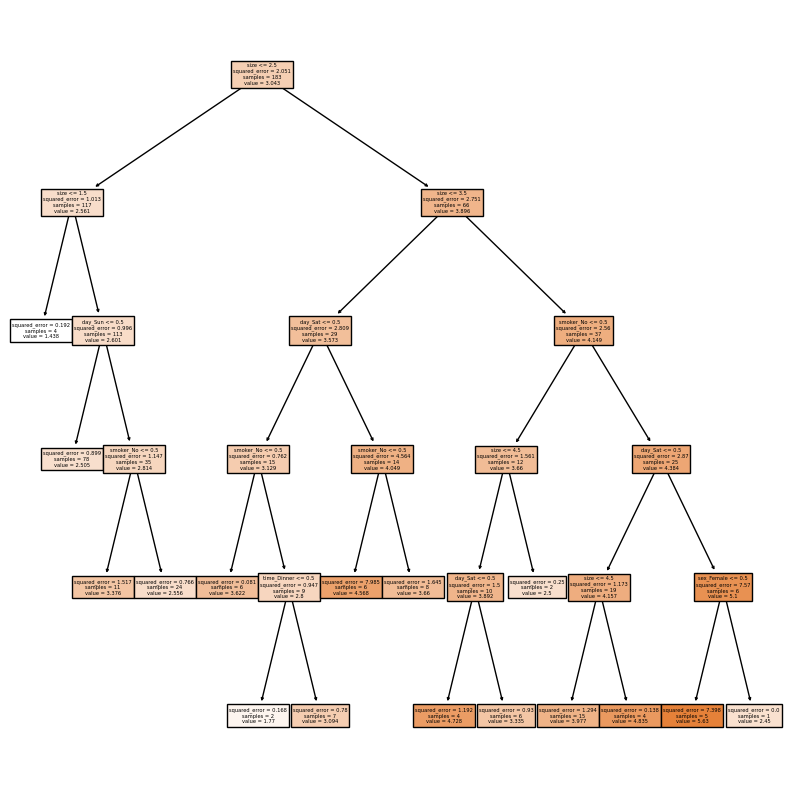

In [46]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X_train.columns,  
                    filled=True) 

In [47]:
arvore_final.score(X_test, y_test)

0.26321950789561044